<a href="https://colab.research.google.com/github/yasirabd/research-diagnostic-turbine/blob/main/Diagnostics_Turbine_Bearing_1_SLA5_Local_Bearing_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Create: 02 February 2022*<br>
*Last Update: 02 February 2022*<br>
*Author: Yasir Abdur Rohman*<br>
**Property of PT Indonesia Power & Lab Getaran & Diagnosis Mesin Undip**

---

## Problem Description

**Case:** ST Journal Bearing 1 - Local Bearing Problem

**Description:**

This fault indicates an abnormal change in the bearing behavior.

Primary indicators are: 
- Bearing Vibration is not normal; Bearing Metal Temperature is low; and either Lube Oil Differential Temperature is low or Lube Oil Drain Outlet Temperature low.  
- Priority 5 (lowest) is triggered when Journal Bearing Vibration is not normal or Journal Bearing Metal Temperature is not normal.  
- The priority escalates depending on the severity of the change, and the number of sensors.  
- At least 2 sensors are required to trigger Priority 1.

**Input Tags:**
- LUBE_OIL_COOLER_OIL_OUTLET_TEMP
- BRG_1_VIB_OVERALL_SEIS_1
- BRG_1_VIB_OVERALL_SEIS_2
- GROSS_LOAD
- LUBE_OIL_COOLER_OIL_OUTLET_PRESS
- BRG_1_DELTA_TEMP_CV
- AMBIENT_TEMP
- BRG_1_MTL_TEMP_1 
- BRG_1_MTL_TEMP_2
- BRG_1_MTL_TEMP_4 
- BRG_1_MTL_TEMP_3
- BRG_1_OIL_DRAIN_TEMP
- BRG_1_VIB_OVERALL_PROX_Y
- BRG_1_VIB_OVERALL_PROX_X

**Expressions:**

```
if
    (ModelIndications (MECHANICAL, [VAR, SVH], [BRG_1_VIB_OVERALL_PROX_X, BRG_1_VIB_OVERALL_SEIS_1, BRG_1_VIB_OVERALL_PROX_Y, BRG_1_VIB_OVERALL_SEIS_2]) >= 2.0
    and 
        (ModelIndications(MECHANICAL, [SVH, SH], [BRG_1_MTL_TEMP_1, BRG_1_MTL_TEMP_2, BRG_1_MTL_TEMP_3, BRG_1_MTL_TEMP_4]) >= 2.0
        or
        ModelIndications (MECHANICAL, [L, VL, SL, SVL], [BRG_1_OIL_DRAIN_TEMP, BRG_1_DELTA_TEMP_CV]) >= 1.0))
then
    Priority(1)
else if 
    (ModelIndications (MECHANICAL, [VAR, SVH], [BRG_1_VIB_OVERALL_PROX_X, BRG_1_VIB_OVERALL_SEIS_1, BRG_1_VIB_OVERALL_PROX_Y, BRG_1_VIB_OVERALL_SEIS_2]) >= 2.0
    or
    ModelIndications (MECHANICAL, [SVH, SH], [BRG_1_MTL_TEMP_1, BRG_1_MTL_TEMP_2, BRG_1_MTL_TEMP_3, BRG_1_MTL_TEMP_4]) >= 2.0
    or 
        (ModelIndications (MECHANICAL, [VAR, SVH],[BRG_1_VIB_OVERALL_PROX_X, BRG_1_VIB_OVERALL_SEIS_1, BRG_1_VIB_OVERALL_PROX_Y, BRG_1_VIB_OVERALL_SEIS_2]) >= 1.0
        and 
            (ModelIndications (MECHANICAL, [SVH, SH], [BRG_1_MTL_TEMP_1, BRG_1_MTL_TEMP_2, BRG_1_MTL_TEMP_3, BRG_1_MTL_TEMP_4]) >= 1.0
            or
            ModelIndications (MECHANICAL, [L, VL, SL, SVL],[BRG_1_OIL_DRAIN_TEMP, BRG_1_DELTA_TEMP_CV]) >= 1.0)))
then
    Priority(2)
else if 
    (ModelIndications (MECHANICAL, [VAR, SVH, AVMH],[BRG_1_VIB_OVERALL_PROX_X, BRG_1_VIB_OVERALL_SEIS_1, BRG_1_VIB_OVERALL_PROX_Y, BRG_1_VIB_OVERALL_SEIS_2]) >= 1.0
    or 
    ModelIndications (MECHANICAL, [SH, AVMH], [BRG_1_MTL_TEMP_1, BRG_1_MTL_TEMP_2, BRG_1_MTL_TEMP_3, BRG_1_MTL_TEMP_4]) >= 1.0
    or 
        (ModelIndications (MECHANICAL, [SH, VH],[BRG_1_VIB_OVERALL_PROX_X, BRG_1_VIB_OVERALL_SEIS_1, BRG_1_VIB_OVERALL_PROX_Y, BRG_1_VIB_OVERALL_SEIS_2]) >= 1.0
        and 
            (ModelIndications (MECHANICAL, [SH, SVH, VH],[BRG_1_MTL_TEMP_1, BRG_1_MTL_TEMP_2, BRG_1_MTL_TEMP_3, BRG_1_MTL_TEMP_4]) >= 1.0
            or
            ModelIndications (MECHANICAL, [L, VL, SL, SVL],[BRG_1_OIL_DRAIN_TEMP, BRG_1_DELTA_TEMP_CV]) >= 1.0)))
then
    Priority(3)
else if 
    (ModelIndications (MECHANICAL, [SH, VH], [BRG_1_VIB_OVERALL_PROX_X, BRG_1_VIB_OVERALL_SEIS_1, BRG_1_VIB_OVERALL_PROX_Y, BRG_1_VIB_OVERALL_SEIS_2]) >= 1.0
    or
    ModelIndications (MECHANICAL, [H], [BRG_1_VIB_OVERALL_PROX_X, BRG_1_VIB_OVERALL_SEIS_1, BRG_1_VIB_OVERALL_PROX_Y, BRG_1_VIB_OVERALL_SEIS_2]) >= 2.0
    or
    ModelIndications (MECHANICAL, [VH], [BRG_1_MTL_TEMP_1, BRG_1_MTL_TEMP_2, BRG_1_MTL_TEMP_3, BRG_1_MTL_TEMP_4]) >= 1.0
    or 
        (ModelIndications (MECHANICAL, [H], [BRG_1_MTL_TEMP_1, BRG_1_MTL_TEMP_2, BRG_1_MTL_TEMP_3, BRG_1_MTL_TEMP_4]) >= 1.0
        and
        ModelIndications (MECHANICAL, [H], [BRG_1_DELTA_TEMP_CV]) >= 1.0))
then
    Priority(4)
else if 
    (ModelIndications(MECHANICAL, [LH], [BRG_1_VIB_OVERALL_PROX_X, BRG_1_VIB_OVERALL_SEIS_1, BRG_1_VIB_OVERALL_PROX_Y, BRG_1_VIB_OVERALL_SEIS_2]) >= 1.0
    or
    ModelIndications (MECHANICAL, [LH], [BRG_1_MTL_TEMP_1, BRG_1_MTL_TEMP_2, BRG_1_MTL_TEMP_3, BRG_1_MTL_TEMP_4]) >= 1.0)
then
    Priority(5)
else
    IsAssociated(MECHANICAL, [GROSS_LOAD, AMBIENT_TEMP, LUBE_OIL_COOLER_OIL_OUTLET_TEMP, LUBE_OIL_COOLER_OIL_OUTLET_PRESS])
```

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from scipy.spatial import distance

from sklearn.metrics import mean_squared_error

# Dataset

In [2]:
path = "/content/drive/MyDrive/Prescriptive Maintenance/Data/Turbine Generator - SLA5/export_datasla5_01jan20-31mar20.csv"

data = pd.read_csv(path)

print(f'Data shape: {data.shape}')

Data shape: (131039, 85)


In [3]:
list(data)

['date',
 'Generator Gross Capacity',
 'Turbine Bearing #01 Metal Temperature',
 'Turbine Bearing #07 X Vibration',
 'Turbine Bearing #07 Y Vibration',
 'Turbine Bearing #08 X Vibration',
 'Turbine Bearing #08 Y Vibration',
 'Turbine Bearing #09 X Vibration',
 'Turbine Bearing #09 Y Vibration',
 'Turbine Bearing #10 X Vibration',
 'Turbine Bearing #10 Y Vibration',
 'Turbine First Stage Exit Metal Temperature',
 'Turbine Gland Steam Pressure',
 'Turbine Gland Steam Temperature',
 'Turbine HP Bypass Spray Valve Position',
 'Turbine HP Bypass Valve Position',
 'Turbine HP Casing Expansion',
 'Turbine HP Exhaust Casing Upper Metal Temperature',
 'Turbine HP Exhaust Steam Temperature',
 'Turbine HP Oil Pressure',
 'Turbine LP A Exhaust Steam Temperature',
 'Turbine LP B Exhaust Steam Temperature',
 'Turbine Lube Oil Cooler Inlet Temperature',
 'Turbine Lube Oil Cooler Outlet Temperature',
 'Turbine Lube Oil Temperature',
 'Turbine Main Steam Casing Lower Metal Temperature',
 'Turbine Main 

In [4]:
# slice data
cols = ['Generator Gross Capacity',
        'Turbine Lube Oil Cooler Outlet Temperature',
        'Turbine.Bearing 1 Drain Oil Temperature',
        'Turbine.Bearing 1 Metal Temperature',
        'Turbine.Bearing 1X Vibration',
        'Turbine.Bearing 1Y Vibration']

data = data[['date']+cols]

# sort by index
data = data.sort_values(by='date').reset_index(drop=True)

# convert date to datetime
data['date'] = pd.to_datetime(data['date'])

In [5]:
# handle missing with interpolation
# for col in cols:
#     data[col] = data[col].interpolate(method='linear')

# data.isnull().sum()

In [6]:
# missing value
data.isnull().sum()/len(data)*100

date                                          0.000000
Generator Gross Capacity                      7.376430
Turbine Lube Oil Cooler Outlet Temperature    7.376430
Turbine.Bearing 1 Drain Oil Temperature       7.379482
Turbine.Bearing 1 Metal Temperature           7.377193
Turbine.Bearing 1X Vibration                  7.376430
Turbine.Bearing 1Y Vibration                  7.376430
dtype: float64

# Prognostic (Estimate)

## Threshold

In [7]:
# threshold from Indonesia Power
val = [[-5, 680],
       [0, 50],
       [0, 77],
       [0, 95],
       [-0.1, 0.125],
       [-0.1, 0.125]]
threshold = pd.DataFrame(val, columns=['Actual (Low)', 'Actual (High)'], index=list(data)[1:])
threshold

,Actual (Low),Actual (High)
Generator Gross Capacity,-5.0,680.000
Turbine Lube Oil Cooler Outlet Temperature,0.0,50.000
Turbine.Bearing 1 Drain Oil Temperature,0.0,77.000
Turbine.Bearing 1 Metal Temperature,0.0,95.000
Turbine.Bearing 1X Vibration,-0.1,0.125
Turbine.Bearing 1Y Vibration,-0.1,0.125


## Infant Model
Create an infant model from data `January 2020` to `March 2020`

In [8]:
# create an infant model
two_weeks = pd.to_datetime('2020-01-01 00:00:00') + pd.DateOffset(days=15)

# filter data by date
filter = (data['date'] >= '2020-01-01 00:00:00') & (data['date'] < two_weeks)
data_slice = data[filter].reset_index(drop=True)
data_slice.shape

(21600, 7)

In [9]:
# create state_matrix for an infant model
state_matrix = []
for i in range(len(data_slice)):
    temp = []
    for col in cols:
        actual = data_slice.loc[i,col]
        th_low = threshold.loc[col, 'Actual (Low)']
        th_high = threshold.loc[col, 'Actual (High)']

        if actual > th_low and actual < th_high:
            temp.append(actual)
        else:
            break

    if len(temp) == 6:
        state_matrix.append(np.array(temp))
    
    if len(state_matrix) == 400:
        state_matrix = np.array(state_matrix).T
        print(i)
        break

399


In [10]:
state_matrix.shape

(6, 400)

In [11]:
np.isnan(state_matrix).sum()

0

## VBM

In [12]:
def scipy_distance(vector1, vector2, dist='euclidean'):
    if dist == 'euclidean':
        return distance.euclidean(vector1, vector2)
    elif dist == 'braycurtis':
        return distance.braycurtis(vector1, vector2)
    elif dist == 'correlation':
        return distance.correlation(vector1, vector2)
    elif dist == 'canberra':
        return distance.canberra(vector1, vector2)
    elif dist == 'chebyshev':
        return distance.chebyshev(vector1, vector2)
    elif dist == 'cityblock':
        return distance.cityblock(vector1, vector2)
    elif dist == 'minkowski':
        return distance.minkowski(vector1, vector2)
    elif dist == 'sqeuclidean':
        return distance.sqeuclidean(vector1, vector2)
    elif dist == 'cosine':
        return distance.cosine(vector1, vector2)

# function to create a dynamic matrix 
def create_dynamic_matrix(matrix, current_actual):
    
    # get current actual
    # current_actual = matrix[:, -1]

    # calculate similarity
    sim_vec = []
    for i in range(matrix.shape[1]):
        sim = 1 - scipy_distance(current_actual, matrix[:, i], dist='canberra')
        sim_vec.append(sim)
    
    # sort the matrix
    n = 10
    top = np.sort(np.array(sim_vec).argsort()[::-1][:n])
    top_sim_vec = np.array(sim_vec)[top]

    # create dynamic matrix
    dynamic_matrix = matrix[:, top]

    # calculate weight
    weight = np.array([s/np.sum(top_sim_vec) for s in top_sim_vec])

    return dynamic_matrix, weight

def vbm(dynamic_matrix, weight):
    return np.dot(dynamic_matrix, weight.T)

# Diagnostic

## Analytic Tag Attributes

https://www.ge.com/digital/documentation/predix-apm/latest/smartsignal-expression-syntax.html

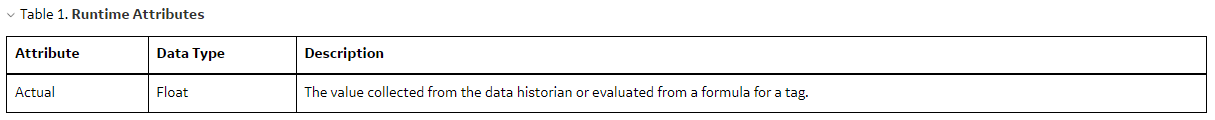

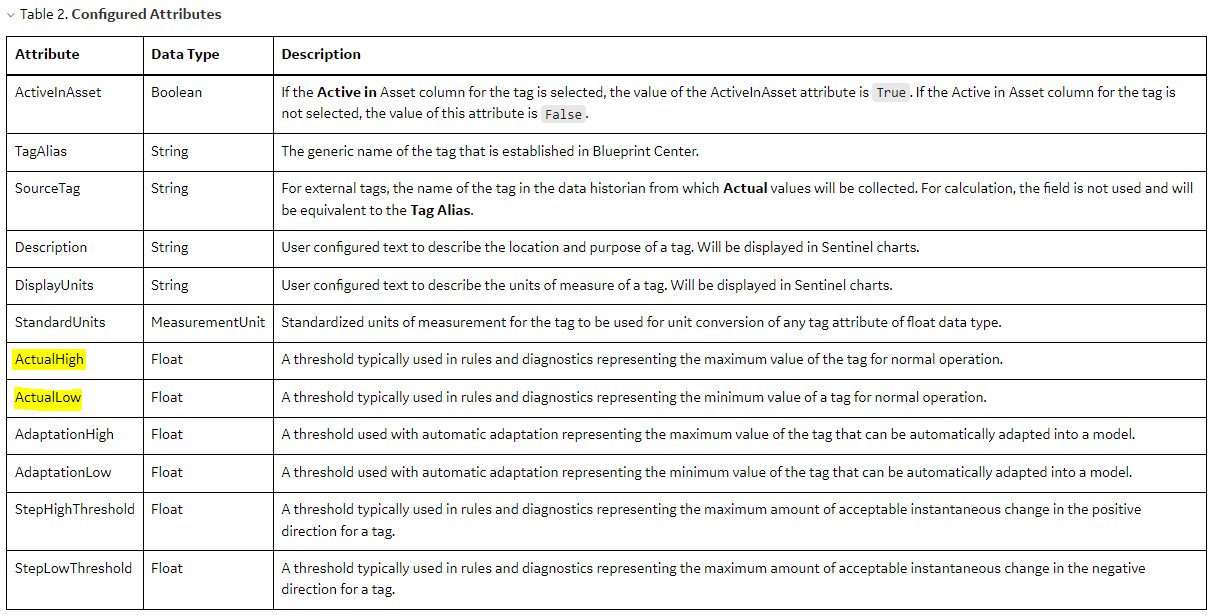

## Model Tag Attributes

https://www.ge.com/digital/documentation/predix-apm/latest/smartsignal-expression-syntax.html

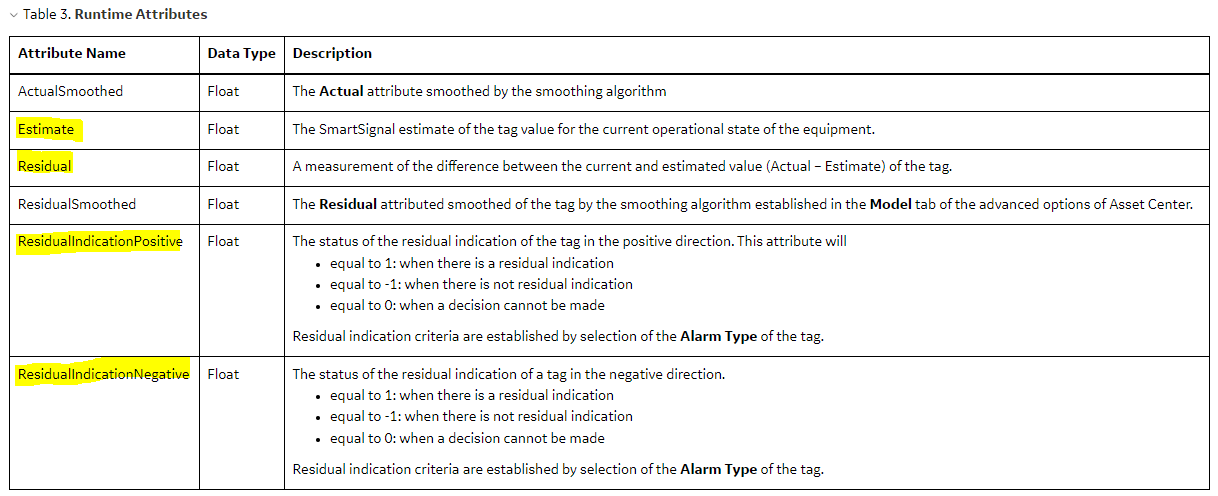

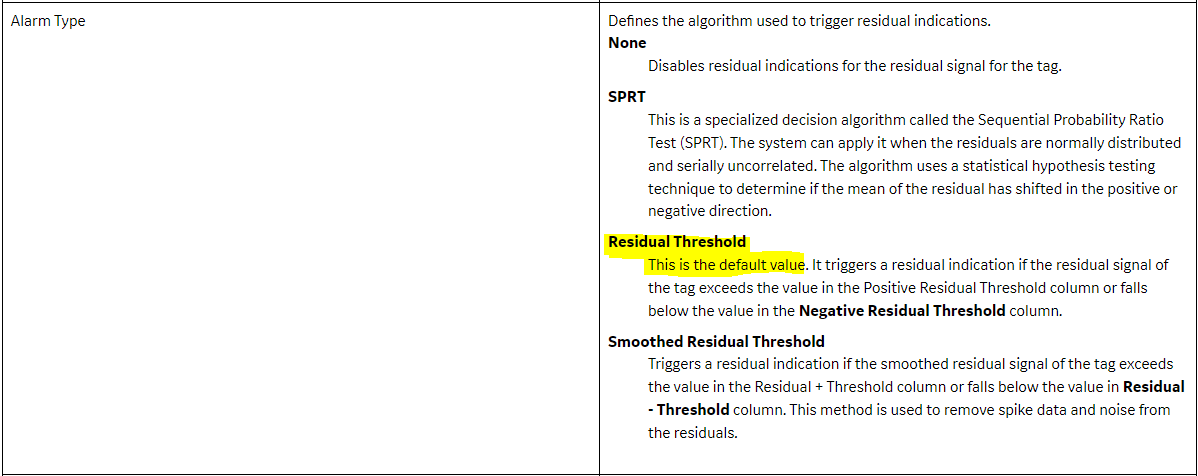

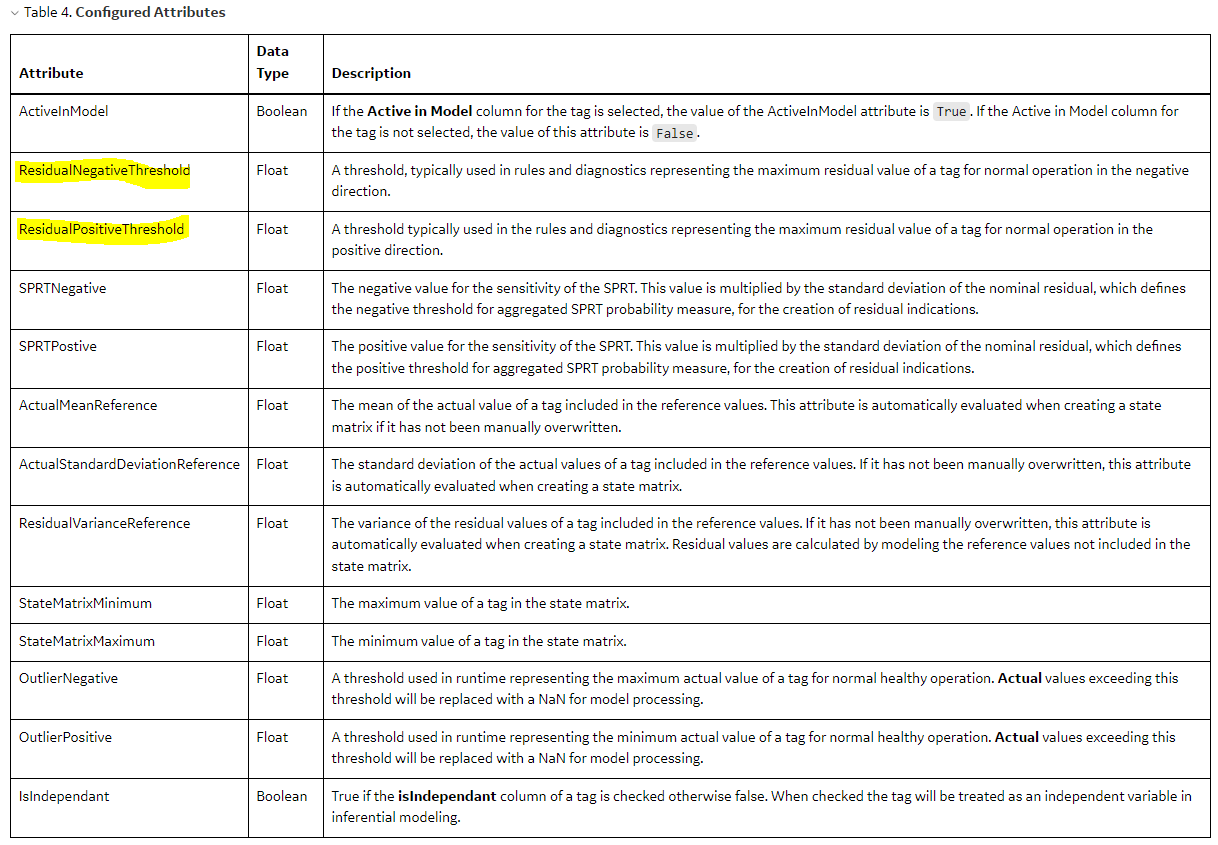

Analytic tag attributes needed for `ST Journal Bearing 1 - Local Bearing Problem`.

Runtime Attributes:
- `Actual`

Configured Attributes:
- `ActualHigh`
- `ActualLow`

Model tag attributes needed for `ST Journal Bearing 1 - Cooling Loss`.

Runtime Attributes:
- `Estimate`
- `Residual`
- `ResidualIndicationPositive`
- `ResidualIndicationNegative`

Configured Attributes:
- `ResidualNegativeThreshold`
- `ResidualPositiveThreshold`

> We choose `AlarmType` by default is `Residual Threshold`

We need to define all of the **Configured Attributes**.

## Define Configured Attributes

In [13]:
# analytic tag
analytic_configured = threshold.copy()
# rename columns name
analytic_configured = analytic_configured.rename(columns={'Actual (Low)':'ActualLow',
                                                          'Actual (High)':'ActualHigh'})
analytic_configured

,ActualLow,ActualHigh
Generator Gross Capacity,-5.0,680.000
Turbine Lube Oil Cooler Outlet Temperature,0.0,50.000
Turbine.Bearing 1 Drain Oil Temperature,0.0,77.000
Turbine.Bearing 1 Metal Temperature,0.0,95.000
Turbine.Bearing 1X Vibration,-0.1,0.125
Turbine.Bearing 1Y Vibration,-0.1,0.125


In [14]:
range_data = analytic_configured['ActualHigh'] - analytic_configured['ActualLow']
range_data

Generator Gross Capacity                      685.000
Turbine Lube Oil Cooler Outlet Temperature     50.000
Turbine.Bearing 1 Drain Oil Temperature        77.000
Turbine.Bearing 1 Metal Temperature            95.000
Turbine.Bearing 1X Vibration                    0.225
Turbine.Bearing 1Y Vibration                    0.225
dtype: float64

In [15]:
# model tag

# use the difference between ActualHigh and ActualLow
values = [[-range_data.iloc[0], range_data.iloc[0], True],
          [-range_data.iloc[1], range_data.iloc[1], True],
          [-range_data.iloc[2], range_data.iloc[2], True],
          [-range_data.iloc[3], range_data.iloc[3], True],
          [-range_data.iloc[4], range_data.iloc[4], True],
          [-range_data.iloc[5], range_data.iloc[5], True]]
           
model_configured = pd.DataFrame(data=values,
                                index=analytic_configured.index,
                                columns=['ResidualNegativeThreshold','ResidualPositiveThreshold', 'ActiveInModel'])
model_configured

,ResidualNegativeThreshold,ResidualPositiveThreshold,ActiveInModel
Generator Gross Capacity,-685.000,685.000,True
Turbine Lube Oil Cooler Outlet Temperature,-50.000,50.000,True
Turbine.Bearing 1 Drain Oil Temperature,-77.000,77.000,True
Turbine.Bearing 1 Metal Temperature,-95.000,95.000,True
Turbine.Bearing 1X Vibration,-0.225,0.225,True
Turbine.Bearing 1Y Vibration,-0.225,0.225,True


## Process Runtime Attributes

In [16]:
N_TAG = 6

def estimate_sensors(actual, state_matrix, analytic_conf):
    """Estimate smart signal
    actual: sensor values
    state_matrix: state matrix
    analytic_conf: object analytic configured attributes
    """

    temp = []
    th = analytic_conf.values
    # CHECK IF WE NEED TO UPDATE THE STATE MATRIX
    for i in range(N_TAG):
        act = actual[i] 
        th_low = th[i][0]
        th_high = th[i][1]
        if act > th_low and act < th_high:
            temp.append(act)
        else:
            break
    # update state_matrix if all of the sensors are normal
    if len(temp) == N_TAG:  # 5 sensors/tags
        temp = np.array(temp).reshape(-1,1)
        state_matrix = np.insert(state_matrix, [400], temp, axis=1)
        state_matrix = state_matrix[:,1:]
    
    # CREATE DYNAMIC MATRIX
    dm, w = create_dynamic_matrix(state_matrix, actual)

    # ESTIMATE DATA
    x_est = np.array(vbm(dm, w))

    return x_est, state_matrix

def calculate_residual(actual, estimate):
    return actual - estimate

def residual_indication_negative_flag(residual, residual_negative_threshold):
    if residual < residual_negative_threshold:
        return 1
    elif residual > residual_negative_threshold:
        return -1
    else:
        return 0

def residual_indication_positive_flag(residual, residual_positive_threshold):
    if residual > residual_positive_threshold:
        return 1
    elif residual < residual_positive_threshold:
        return -1
    else:
        return 0    

### Data 1

In [ ]:
big_matrix = data[cols].values.T
big_matrix.shape

(6, 131039)

In [ ]:
%%time
actuals = []
estimates = []
residuals = []
residual_ind_pos = []
residual_ind_neg = []
state_matrix = state_matrix

for i in range(big_matrix.shape[1]):
    current_actual = big_matrix[:, i]

    # calculate estimate value
    x_est, state_matrix = estimate_sensors(actual=current_actual,
                                           state_matrix=state_matrix,
                                           analytic_conf=analytic_configured)
    
    # calculate residual
    residual = calculate_residual(current_actual, x_est)

    # residual threshold
    model_conf = model_configured.values
    resid_ind_pos = []
    resid_ind_neg = []

    for j in range(N_TAG):
        residual_positive_th = model_conf[j][1]
        residual_negative_th = model_conf[j][0]

        resid_pos = residual_indication_positive_flag(residual[j], residual_positive_th)
        resid_neg = residual_indication_negative_flag(residual[j], residual_negative_th)
        
        resid_ind_pos.append(resid_pos)
        resid_ind_neg.append(resid_neg)
        
    # append to list
    actuals.append(current_actual)
    estimates.append(x_est)
    residuals.append(residual)
    residual_ind_pos.append(resid_ind_pos)
    residual_ind_neg.append(resid_ind_neg)
    
# convert to numpy array
actuals = np.array(actuals)
estimates = np.array(estimates)
residuals = np.array(residuals)
residual_ind_pos = np.array(residual_ind_pos)
residual_ind_neg = np.array(residual_ind_neg)

CPU times: user 37min 8s, sys: 1min 49s, total: 38min 58s
Wall time: 38min 6s


In [19]:
# create data frame
df_actual = pd.DataFrame(actuals, columns=cols)
df_estimate = pd.DataFrame(estimates, columns=cols)
df_residual = pd.DataFrame(residuals, columns=cols)
df_resid_ind_pos = pd.DataFrame(residual_ind_pos, columns=cols)
df_resid_ind_neg = pd.DataFrame(residual_ind_neg, columns=cols)

# add date
df_actual['date'] = data['date']
df_estimate['date'] = data['date']
df_residual['date'] = data['date']
df_resid_ind_pos['date'] = data['date']
df_resid_ind_neg['date'] = data['date']

In [20]:
# export result
np.save('data_state_matrix.npy', state_matrix)
df_actual.to_csv('data_df_actual.csv', index=False)
df_estimate.to_csv('data_df_estimate.csv', index=False)
df_residual.to_csv('data_df_residual.csv', index=False)
df_resid_ind_pos.to_csv('data_df_resid_ind_pos.csv', index=False)
df_resid_ind_neg.to_csv('data_df_resid_ind_neg.csv', index=False)

In [17]:
# load result
df_actual = pd.read_csv('data_df_actual.csv')
df_estimate = pd.read_csv('data_df_estimate.csv')
df_residual = pd.read_csv('data_df_residual.csv')
df_resid_ind_pos = pd.read_csv('data_df_resid_ind_pos.csv')
df_resid_ind_neg = pd.read_csv('data_df_resid_ind_neg.csv')

# convert date
df_actual['date'] = pd.to_datetime(df_actual['date'])
df_estimate['date'] = pd.to_datetime(df_estimate['date'])
df_residual['date'] = pd.to_datetime(df_residual['date'])
df_resid_ind_pos['date'] = pd.to_datetime(df_resid_ind_pos['date'])
df_resid_ind_neg['date'] = pd.to_datetime(df_resid_ind_neg['date'])

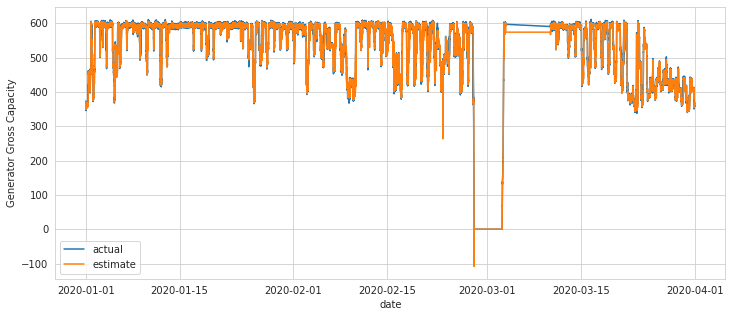

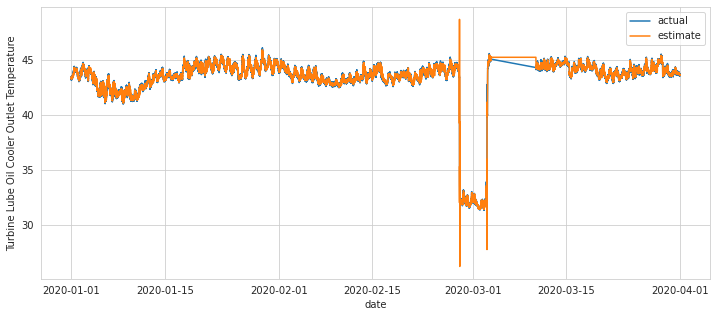

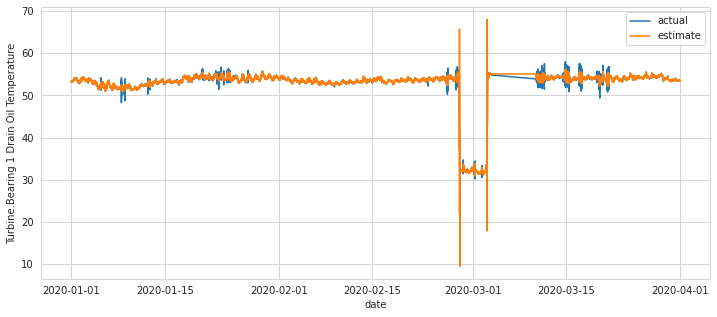

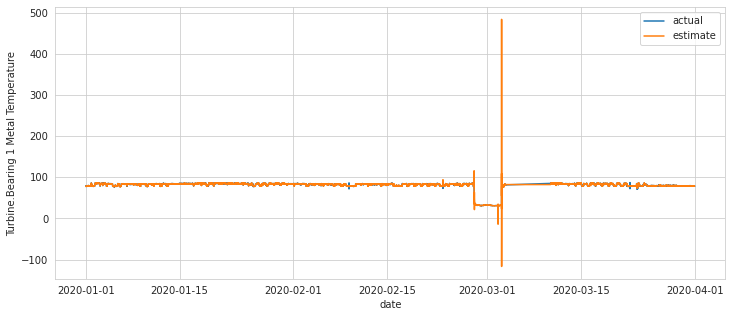

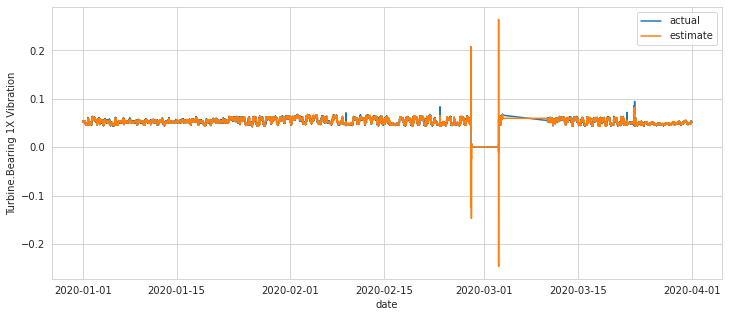

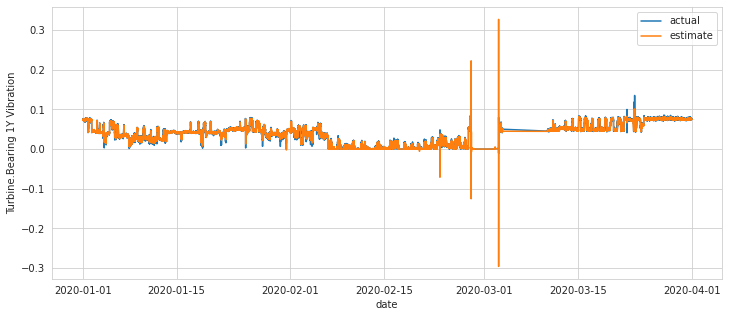

In [18]:
# plot actual and estimate
for i,col in enumerate(cols):
    plt.figure(figsize=(12,5))
    sns.lineplot(data=df_actual, x="date", y=col)
    sns.lineplot(data=df_estimate, x="date", y=col)
    plt.legend(['actual','estimate'])
    plt.show();

## Calculated Tags

In [19]:
# load data
data_actual = pd.read_csv('data_df_actual.csv')
data_estimate = pd.read_csv('data_df_estimate.csv')
data_residual = pd.read_csv('data_df_residual.csv')
data_resid_ind_neg = pd.read_csv('data_df_resid_ind_neg.csv')
data_resid_ind_pos = pd.read_csv('data_df_resid_ind_pos.csv')

In [20]:
# convert date to datetime
data_actual['date'] = pd.to_datetime(data_actual['date'])
data_estimate['date'] = pd.to_datetime(data_estimate['date'])
data_residual['date'] = pd.to_datetime(data_residual['date'])
data_resid_ind_neg['date'] = pd.to_datetime(data_resid_ind_neg['date'])
data_resid_ind_pos['date'] = pd.to_datetime(data_resid_ind_pos['date'])

### BRG_1_DELTA_TEMP_CV

In [23]:
def math_median(values, lower_threshold=False, upper_threshold=False, alway_evaluate=True):
    result = []
    if lower_threshold and upper_threshold:
        values = [v for v in values if v >= lower_threshold and v <= upper_threshold]
    elif upper_threshold:
        values = [v for v in values if v <= upper_threshold]
    elif lower_threshold:
        values = [v for v in values if v >= lower_threshold]
    else:
        values = values
    return np.median(values)

# static values
adaptation_low = analytic_configured.loc['Turbine.Bearing 1 Metal Temperature']['ActualLow']
adaptation_high = analytic_configured.loc['Turbine.Bearing 1 Metal Temperature']['ActualHigh']

def calculate_delta_temperature_bearing1(LUBE_OIL_COOLER_OIL_OUTLET_TEMP, BRG_1_MTL_TEMP_1):
    median_metal_temp = math_median(values=[BRG_1_MTL_TEMP_1], 
                                    lower_threshold=0.4*adaptation_low,
                                    upper_threshold=1.6*adaptation_high)
    return median_metal_temp - LUBE_OIL_COOLER_OIL_OUTLET_TEMP

In [24]:
# Actual
delta_bearing1 = []
for i in range(len(data_actual)):
    delta = calculate_delta_temperature_bearing1(data_actual.loc[i, 'Turbine Lube Oil Cooler Outlet Temperature'],
                                                 data_actual.loc[i, 'Turbine.Bearing 1 Metal Temperature'])
    delta_bearing1.append(delta)
data_actual['BRG_1_DELTA_TEMP_CV'] = delta_bearing1

# Estimate
delta_bearing1 = []
for i in range(len(data_estimate)):
    delta = calculate_delta_temperature_bearing1(data_estimate.loc[i, 'Turbine Lube Oil Cooler Outlet Temperature'],
                                                 data_estimate.loc[i, 'Turbine.Bearing 1 Metal Temperature'])
    delta_bearing1.append(delta)
data_estimate['BRG_1_DELTA_TEMP_CV'] = delta_bearing1

# Residual
delta_bearing1 = []
for i in range(len(data_residual)):
    delta = calculate_delta_temperature_bearing1(data_residual.loc[i, 'Turbine Lube Oil Cooler Outlet Temperature'],
                                                 data_residual.loc[i, 'Turbine.Bearing 1 Metal Temperature'])
    delta_bearing1.append(delta)
data_residual['BRG_1_DELTA_TEMP_CV'] = delta_bearing1

# Residual Indication Positive
delta_bearing1 = []
for i in range(len(data_resid_ind_pos)):
    delta = calculate_delta_temperature_bearing1(data_resid_ind_pos.loc[i, 'Turbine Lube Oil Cooler Outlet Temperature'],
                                                 data_resid_ind_pos.loc[i, 'Turbine.Bearing 1 Metal Temperature'])
    delta_bearing1.append(delta)
data_resid_ind_pos['BRG_1_DELTA_TEMP_CV'] = delta_bearing1

# Residual Indication Negative
delta_bearing1 = []
for i in range(len(data_resid_ind_neg)):
    delta = calculate_delta_temperature_bearing1(data_resid_ind_neg.loc[i, 'Turbine Lube Oil Cooler Outlet Temperature'],
                                                 data_resid_ind_neg.loc[i, 'Turbine.Bearing 1 Metal Temperature'])
    delta_bearing1.append(delta)
data_resid_ind_neg['BRG_1_DELTA_TEMP_CV'] = delta_bearing1

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [25]:
data_estimate[data_estimate['BRG_1_DELTA_TEMP_CV'].isnull()]

,Generator Gross Capacity,Turbine Lube Oil Cooler Outlet Temperature,Turbine.Bearing 1 Drain Oil Temperature,Turbine.Bearing 1 Metal Temperature,Turbine.Bearing 1X Vibration,Turbine.Bearing 1Y Vibration,date,BRG_1_DELTA_TEMP_CV
89490,0.220328,35.976816,68.043995,483.445747,0.263971,0.326847,2020-03-03 03:30:00,NaN


In [26]:
calculate_delta_temperature_bearing1(35.976816, 483.445747)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [27]:
data =  {'df_actual': data_actual.copy().set_index('date'),
         'df_estimate': data_estimate.copy().set_index('date'),
         'df_residual': data_residual.copy().set_index('date'),
         'df_resid_ind_pos': data_resid_ind_pos.copy().set_index('date'),
         'df_resid_ind_neg': data_resid_ind_neg.copy().set_index('date')}

## Rule Assignment

https://www.ge.com/digital/documentation/predix-apm/latest/r_apm_smartsignal_exp_syn_logical_functions.html

Function: `WindowRatio()`
- Description: This function looks at a window of data and compares it to a threshold. If the number of true comparisons is greater than or equal to the `trueSize` than `windowRatio` will return `true` otherwise it will return `false`.
    - Integer `trueSize`, The trueSize specifies the number of true comparison must be found in the window (specified in values) for windowRatio to return `True`. When a `NaN` present in values the `TrueSize` is divided by the window to create a ratio (or percentage) for which 
    - List values, A list of tag values to be compared to the threshold. The window size is specified by the size of the list. E.g. `Tag.Actual(20)` is a window of 20 
    - String comparisonOperator,  Specifies how to compare the values to the threshold. Valid options are: `=`, `>`, `<`, `>=`, `<=`, `!=`. The operator must be in quotes, `“=”`
    - Float threshold, A threshold that the values will be compared to
    - Integer requiredGoodSize, The required number of numeric values. If the number of numeric (non `NaN`s) in values is less than this value `windowRatio` will return `false`. Typically `requiredGoodSize` is about `one half the window size.`
- Example: `WindowRatio(17, Tag.ResidualIndicationPositive(18), ”=”, 1, 9)`

---

Function: `isStep()`
- Description: This function returns true if there is a step change in values provided.

    `Olympic smoothing` will be performed on the values provided (excluding the most recent observation) to obtain the `averageValue` previous to the most recent observation. The two most recent observations will be compared to the `averageValue` evaluating the difference. A step change is determined if for both comparisons:

    ```value – averageValue > |stepUpThreshold| or value – averageValue < -|stepDownThreshold|```

    - `values`: A set of tag history containing at least 4 observations E.g. `Tag.Actual(7)`
    - `stepUpThreshold`: Required magnitude of the step change in the positive direction. Step up can be ignored by specifying a stepUpThreshold of NaN()
    - `stepDownThreshold`: Required magnitude of the step change in the negative direction. Step down can be ignored by specifying a stepUpThreshold of NaN()
- Example: `isStep(Tag.Actual(7), Tag.StepHigh, Tag.StepLow)`

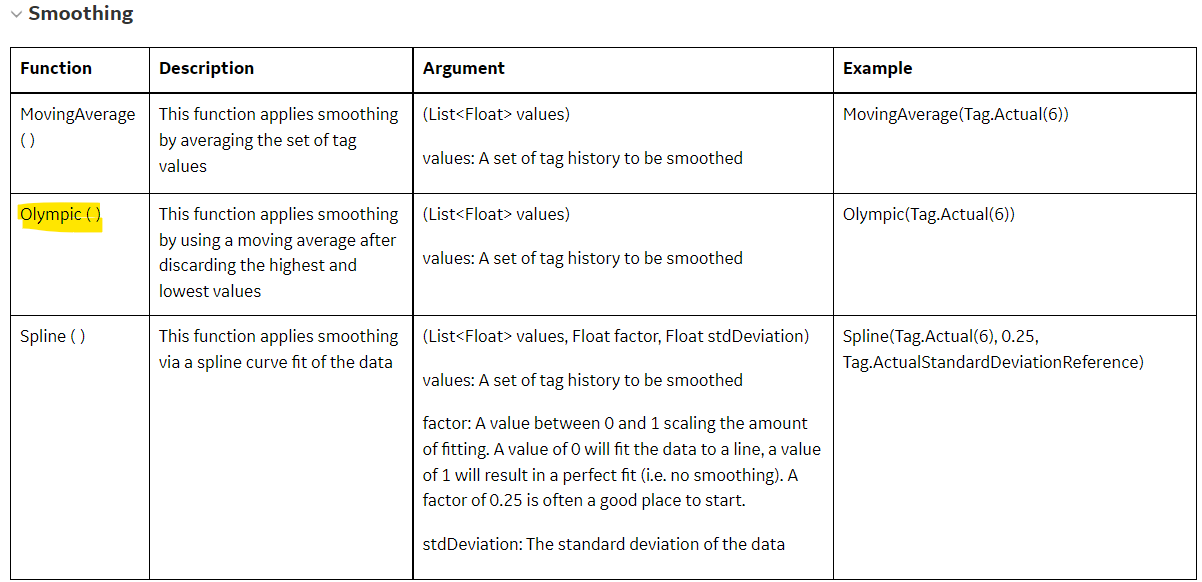

In [28]:
from datetime import timedelta

class Tag(object):

    def __init__(self, name, date, data):
        self.name = name
        self.date = date
        self.actual = []
        self.residual = []
        self.residual_indication_positive = []
        self.residual_indication_negative = []
        self.residual_positive_threshold = self.get_residual_positive_threshold()
        self.residual_negative_threshold = self.get_residual_negative_threshold()
        # additional params
        self.actual_df = data['df_actual']
        self.estimate_df = data['df_estimate']
        self.residual_df = data['df_residual']
        self.resid_indpos_df = data['df_resid_ind_pos']
        self.resid_indneg_df = data['df_resid_ind_neg']

    def Actual(self, n=1):
        start_date = self.get_start_date(self.date, n)
        self.actual = self.actual_df.loc[start_date:self.date][self.name]
        return self.actual.values
    
    def Residual(self, n=1):
        start_date = self.get_start_date(self.date, n)
        self.residual = self.residual_df.loc[start_date:self.date][self.name]
        return self.residual.values
    
    def ResidualIndicationPositive(self, n=1):
        start_date = self.get_start_date(self.date, n)
        self.residual_indication_positive = self.resid_indpos_df.loc[start_date:self.date][self.name]
        return self.residual_indication_positive.values

    def ResidualIndicationNegative(self, n=1):
        start_date = self.get_start_date(self.date, n)
        self.residual_indication_negative = self.resid_indneg_df.loc[start_date:self.date][self.name]
        return self.residual_indication_negative.values
    
    def ResidualPositiveThreshold(self):
        return self.residual_positive_threshold

    def ResidualNegativeThreshold(self):
        return self.residual_negative_threshold

    def ActualHigh(self):
        return analytic_configured.loc[self.name]['ActualHigh']

    def ActiveInModel(self):
        return model_configured.loc[self.name]['ActiveInModel']
        
    def get_start_date(self, date, n):
        return pd.to_datetime(date) - timedelta(minutes=n-1)

    def get_residual_positive_threshold(self):
        return model_configured.loc[self.name]['ResidualPositiveThreshold']

    def get_residual_negative_threshold(self):
        return model_configured.loc[self.name]['ResidualNegativeThreshold']

In [29]:
# example
tag = Tag(name="Generator Gross Capacity",
          date='2020-01-01 09:10:00',
          data=data)
tag.Actual(18)

array([458.1123  , 458.579559, 458.088318, 456.565369, 460.143921,
       457.721252, 457.914948, 458.192322, 458.687622, 461.552979,
       458.3939  , 459.102844, 458.716675, 458.199768, 459.4014  ,
       458.8157  , 459.705658, 457.794861])

In [30]:
import operator

comp_operator = {
    '=': operator.eq,
    '>': operator.gt,
    '<': operator.lt,
    '>=': operator.ge,
    '<=': operator.le,
    '!=': operator.ne
}

def window_ratio(true_size, values, comparison, threshold, required_size):
    # check required good size
    if np.count_nonzero(~np.isnan(values)) < required_size: return False

    # check if nan available in data
    if np.isnan(values).any():  # there is/are nan/s
        # calculate ratio true size
        ratio_true_size = true_size / len(values)
        
        # filter non nan
        non_nan = [val for val in values if ~np.isnan(val)]

        # compare values with threshold
        comp = [True if comp_operator.get(comparison)(v,threshold) else False for v in non_nan]
        ratio_non_nan = np.sum(comp) / len(comp)

        return True if ratio_non_nan >= ratio_true_size else False
    else: # there is not nan
        # compare values with threshold
        comp = [True if comp_operator.get(comparison)(v,threshold) else False for v in values]
        # check the number of true comparisons and compare them with true_size
        return True if np.sum(comp) >= true_size else False

def moving_average(a, n=2) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def smoothing(values, fn="olympic"):
    if fn == "olympic":
        # delete min and max value
        values = np.delete(values, values.argmin())
        values = np.delete(values, values.argmax())
        # moving average with window = 2 
        values = moving_average(values, n=2)
        return values

def is_step(values, step_up_threshold, step_down_threshold):
    # check values
    if len(values) < 4: return False
    
    # exclude the most recent values
    history = values[:-1]
    history = smoothing(history)
    avg_value = np.mean(history)

    # get the two most recent observation
    obs = values[-2:]

    # check NaN
    if step_up_threshold == "NaN":
        rule_val1 = obs[0] - avg_value < -abs(step_down_threshold)
        rule_val2 = obs[1] - avg_value < -abs(step_down_threshold)
    elif step_down_threshold == "NaN":
        rule_val1 = obs[0] - avg_value > abs(step_up_threshold)
        rule_val2 = obs[1] - avg_value > abs(step_up_threshold)
    else:
        rule_val1 = (obs[0] - avg_value > abs(step_up_threshold)) or (obs[0] - avg_value < -abs(step_down_threshold))
        rule_val2 = (obs[1] - avg_value > abs(step_up_threshold)) or (obs[1] - avg_value < -abs(step_down_threshold))

    return rule_val1 and rule_val2

### High (H)

**Expressions:**

```
(WindowRatio(16, Tag.ResidualIndicationPositive(18), "=", 1, 9)) And 
(Tag.Residual >= Tag.ResidualPositiveThreshold)
```

In [31]:
def high(tag) -> bool:
    rule1 = window_ratio(16, tag.ResidualIndicationPositive(18), "=", 1, 9)
    rule2 = tag.Residual(1) >= tag.ResidualPositiveThreshold()
    return rule1 and rule2

In [32]:
tag = Tag(name="Generator Gross Capacity", 
          date="2021-08-01 00:07:00",
          data=data)

high(tag)

False

### Very High (VH)

Expressions:
```
(WindowRatio(8, Tag.ResidualIndicationPositive(9), "=", 1, 6)) And 
(WindowRatio(6, Tag.Residual(9), ">=", (2.0* TagResidualPositiveThreshold), 6)) and
(Tag.Residual>=(2.0* Tag.ResidualPositiveThreshold))
```

In [33]:
def very_high(tag) -> bool:
    rule1 = window_ratio(8, tag.ResidualIndicationPositive(9), "=", 1, 6)
    rule2 = window_ratio(6, tag.Residual(9), ">=", (2.*tag.ResidualPositiveThreshold()),6)
    rule3 = tag.Residual(1) >= (2.*tag.ResidualPositiveThreshold())
    return rule1 and rule2 and rule3

In [34]:
tag = Tag(name="Generator Gross Capacity", 
          date="2021-08-01 00:07:00",
          data=data)

very_high(tag)

False

### Step High (SH)

**Expressions:**
```
IsStep(Tag.Actual(7), 2.5* Tag.ResidualPositiveThreshold, NaN()) And
(Tag.Residual>(1.5* Tag.ResidualPositiveThreshold))
```

In [35]:
def step_high(tag) -> bool:
    rule1 = is_step(values=tag.Actual(7), 
                    step_up_threshold=2.5*tag.ResidualPositiveThreshold(),
                    step_down_threshold="NaN")
    rule2 = tag.Residual(1) > 1.5*tag.ResidualPositiveThreshold()
    return rule1 and rule2

In [36]:
tag = Tag(name="Generator Gross Capacity", 
          date="2021-08-01 00:07:00",
          data=data)

step_high(tag)

False

### Step Very High (SVH)

**Expressions:**
```
IsStep(Tag.Actual(7), 3.0*Tag.ResidualPositiveThreshold, NaN()) and 
(Tag.Residual > (2.0*Tag.ResidualPositiveThreshold)) and 
Tag.ResidualIndicationPositive=1
```

In [37]:
def step_very_high(tag) -> bool:
    rule1 = is_step(values=tag.Actual(7), 
                    step_up_threshold=3.*tag.ResidualPositiveThreshold(),
                    step_down_threshold="NaN")
    rule2 = tag.Residual(1) > 2.*tag.ResidualPositiveThreshold()
    rule3 = tag.ResidualIndicationPositive(1) == 1
    return rule1 and rule2 and rule3

In [38]:
tag = Tag(name="Generator Gross Capacity", 
          date="2021-08-01 00:07:00",
          data=data)

step_very_high(tag)

False

### Variance (VAR)

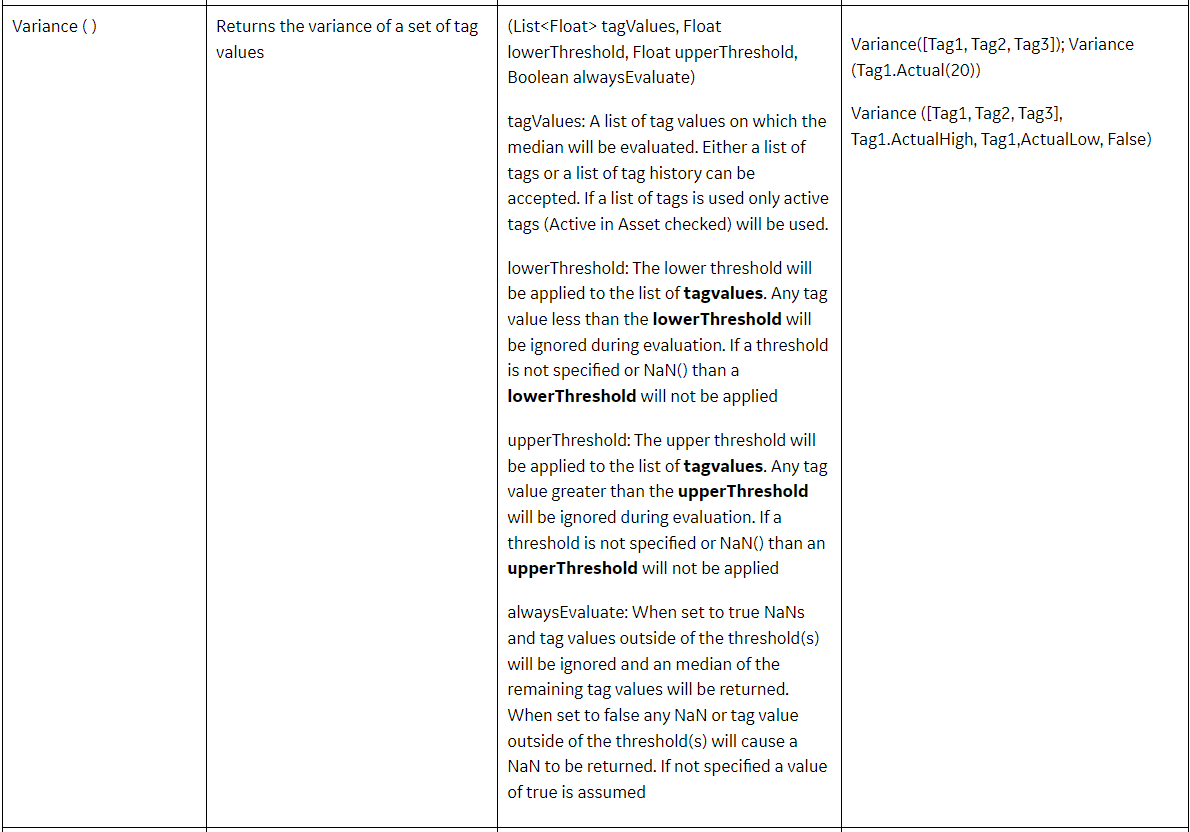

Expressions:
```
(Variance(Tag.Residual(18)) > (4*Minimum([abs(Tag.ResidualPositiveThreshold), abs(Tag.ResidualNegativeThreshold)])^2))
And 
WindowRatio(2, Tag.Residual(6),"">="",Minimum([abs(Tag.ResidualPositiveThreshold), abs(Tag.ResidualNegativeThreshold)]),4)
And 
WindowRatio(2,Tag.Residual(6),""<="",(-1)*Minimum([abs(Tag.ResidualPositiveThreshold), abs(Tag.ResidualNegativeThreshold)]),4)
```

In [39]:
def math_variance(values, lower_threshold="NaN", upper_threshold="NaN"):
    # variance with threshold not implemented yet
    return np.var(values)

def math_minimum(values, lower_threshold="NaN", upper_threshold="NaN"):
    # minimum with threshold not implemented yet
    return np.min(values)

def variance(tag) -> bool:
    rule1 = math_variance(tag.Residual(18)) > (4*math_minimum([abs(tag.ResidualPositiveThreshold()), abs(tag.ResidualPositiveThreshold())])**2)
    rule2 = window_ratio(true_size=2, 
                         values=tag.Residual(6), 
                         comparison=">=", 
                         threshold=math_minimum([abs(tag.ResidualPositiveThreshold()), abs(tag.ResidualPositiveThreshold())]),
                         required_size=4)
    rule3 = window_ratio(true_size=2, 
                         values=tag.Residual(6), 
                         comparison="<=", 
                         threshold=-1*math_minimum([abs(tag.ResidualPositiveThreshold()), abs(tag.ResidualPositiveThreshold())]),
                         required_size=4)
    return rule1 and rule2 and rule3

In [40]:
tag = Tag(name="Generator Gross Capacity", 
          date="2021-08-01 00:07:00",
          data=data)

variance(tag)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


False

### Actual High Model (AVMH)

Expressions:
```
WindowRatio(5,Tag.Actual(6),">=",Tag.ActualHigh,4) 
and
(Tag.ActiveInModel) 
and
(Tag.Actual >= Tag.ActualHigh)
```

In [41]:
def actual_high_model(tag) -> bool:
    rule1 = window_ratio(5, tag.Actual(6), ">=", tag.ActualHigh(), 4)
    rule2 = tag.ActiveInModel()
    rule3 = (tag.Actual() >= tag.ActualHigh())
    return rule1 and rule2 and rule3

In [42]:
tag = Tag(name="Generator Gross Capacity", 
          date="2021-08-01 00:07:00",
          data=data)

actual_high_model(tag)

False

### Low (L)

Expressions:
```
(WindowRatio(16, Tag.ResidualIndicationNegative(18),"=",1,9)) 
And 
(Tag.Residual<= Tag.ResidualNegativeThreshold)
```

In [43]:
def low(tag) -> bool:
    rule1 = window_ratio(16, tag.ResidualIndicationNegative(18), "=", 1, 9)
    rule2 = tag.Residual() <= tag.ResidualNegativeThreshold()
    return rule1 and rule2

In [44]:
tag = Tag(name="Generator Gross Capacity", 
          date="2021-08-01 00:07:00",
          data=data)

low(tag)

False

### Long High (LH)

Expressions:
```
WindowRatio(45, Tag.ResidualIndicationPositive(48), "=", 1, 24)
And
(Tag.Residual >= Tag.ResidualPositiveThreshold)
```

In [67]:
def long_high(tag) -> bool:
    rule1 = window_ratio(45, tag.ResidualIndicationPositive(48), "=", 1, 24)
    rule2 = tag.Residual() <= tag.ResidualPositiveThreshold()
    return rule1 and rule2

In [68]:
tag = Tag(name="Generator Gross Capacity", 
          date="2021-08-01 00:07:00",
          data=data)

long_high(tag)

False

### Step Low (SL)

Expressions:
```
Isstep(Tag.Actual(7), NaN(), 2.5* Tag.ResidualNegativeThreshold)
And
(Tag.Residual<(1.5* Tag.ResidualNegativeThreshold))
```

In [47]:
def step_low(self) -> bool:
    rule1 = is_step(tag.Actual(7), "NaN", 2.5*tag.ResidualNegativeThreshold())
    rule2 = tag.Residual() < (1.5*tag.ResidualNegativeThreshold())
    return rule1 and rule2

In [48]:
tag = Tag(name="Generator Gross Capacity", 
          date="2021-08-01 00:07:00",
          data=data)

step_low(tag)

False

### Step Very Low (SVL)

Expressions:
```
Isstep(Tag.Actual(7), NaN(), 3.0*Tag.ResidualNegativeThreshold)
And
(Tag.Residual<(2.0*Tag.ResidualNegativeThreshold))
And
Tag.ResidualIndicationNegative=1
```

In [49]:
def step_very_low(self) -> bool:
    rule1 = is_step(tag.Actual(7), "NaN", 3.*tag.ResidualNegativeThreshold())
    rule2 = tag.Residual() < (2.*tag.ResidualNegativeThreshold())
    rule3 = tag.ResidualIndicationNegative() == 1
    return rule1 and rule2 and rule3

In [50]:
tag = Tag(name="Generator Gross Capacity", 
          date="2021-08-01 00:07:00",
          data=data)

step_very_low(tag)

False

### Very Low (VL)

Expressions:
```
(WindowRatio(8, Tag.ResidualIndicationNegative(9), "=", 1, 6))
And
(WindowRatio(6, Tag.Residual(9), "<=", (2.0* Tag.ResidualNegativeThreshold), 6))
and
(Tag.Residual<=(2.0* Tag.ResidualNegativeThreshold))
```

In [51]:
def very_low(self) -> bool:
    rule1 = window_ratio(8, tag.ResidualIndicationNegative(9), "=", 1, 6)
    rule2 = window_ratio(6, tag.Residual(9), "<=", 2.*tag.ResidualNegativeThreshold(), 6)
    rule3 = tag.Residual() <= 2.*tag.ResidualNegativeThreshold()
    return rule1 and rule2 and rule3

In [52]:
tag = Tag(name="Generator Gross Capacity", 
          date="2021-08-01 00:07:00",
          data=data)

very_low(tag)

False

## Model Diagnostic

**Modified Expressions:**

```
if
    (ModelIndications (MECHANICAL, [VAR, SVH], [Turbine.Bearing 1X Vibration, Turbine.Bearing 1Y Vibration]) >= 2.0
    and 
        (ModelIndications(MECHANICAL, [SVH, SH], [Turbine.Bearing 1 Metal Temperature]) >= 2.0
        or
        ModelIndications (MECHANICAL, [L, VL, SL, SVL], [Turbine.Bearing 1 Drain Oil Temperature, BRG_1_DELTA_TEMP_CV]) >= 1.0))
then
    Priority(1)
else if 
    (ModelIndications (MECHANICAL, [VAR, SVH], [Turbine.Bearing 1X Vibration, Turbine.Bearing 1Y Vibration]) >= 2.0
    or
    ModelIndications (MECHANICAL, [SVH, SH], [Turbine.Bearing 1 Metal Temperature]) >= 2.0
    or 
        (ModelIndications (MECHANICAL, [VAR, SVH],[Turbine.Bearing 1X Vibration, Turbine.Bearing 1Y Vibration]) >= 1.0
        and 
            (ModelIndications (MECHANICAL, [SVH, SH], [Turbine.Bearing 1 Metal Temperature]) >= 1.0
            or
            ModelIndications (MECHANICAL, [L, VL, SL, SVL],[Turbine.Bearing 1 Drain Oil Temperature, BRG_1_DELTA_TEMP_CV]) >= 1.0)))
then
    Priority(2)
else if 
    (ModelIndications (MECHANICAL, [VAR, SVH, AVMH],[Turbine.Bearing 1X Vibration, Turbine.Bearing 1Y Vibration]) >= 1.0
    or 
    ModelIndications (MECHANICAL, [SH, AVMH], [Turbine.Bearing 1 Metal Temperature]) >= 1.0
    or 
        (ModelIndications (MECHANICAL, [SH, VH],[Turbine.Bearing 1X Vibration, Turbine.Bearing 1Y Vibration]) >= 1.0
        and 
            (ModelIndications (MECHANICAL, [SH, SVH, VH],[Turbine.Bearing 1 Metal Temperature]) >= 1.0
            or
            ModelIndications (MECHANICAL, [L, VL, SL, SVL],[Turbine.Bearing 1 Drain Oil Temperature, BRG_1_DELTA_TEMP_CV]) >= 1.0)))
then
    Priority(3)
else if 
    (ModelIndications (MECHANICAL, [SH, VH], [Turbine.Bearing 1X Vibration, Turbine.Bearing 1Y Vibration]) >= 1.0
    or
    ModelIndications (MECHANICAL, [H], [Turbine.Bearing 1X Vibration, Turbine.Bearing 1Y Vibration]) >= 2.0
    or
    ModelIndications (MECHANICAL, [VH], [Turbine.Bearing 1 Metal Temperature]) >= 1.0
    or 
        (ModelIndications (MECHANICAL, [H], [Turbine.Bearing 1 Metal Temperature]) >= 1.0
        and
        ModelIndications (MECHANICAL, [H], [BRG_1_DELTA_TEMP_CV]) >= 1.0))
then
    Priority(4)
else if 
    (ModelIndications(MECHANICAL, [LH], [Turbine.Bearing 1X Vibration, Turbine.Bearing 1Y Vibration]) >= 1.0
    or
    ModelIndications (MECHANICAL, [LH], [Turbine.Bearing 1 Metal Temperature]) >= 1.0)
then
    Priority(5)
else
    IsAssociated(MECHANICAL, [GROSS_LOAD, AMBIENT_TEMP, LUBE_OIL_COOLER_OIL_OUTLET_TEMP, LUBE_OIL_COOLER_OIL_OUTLET_PRESS])
```

Function: `ModelIndications()`
- Description: Returns a count of the number of model tag advisory indications on a set of model tags.

    An advisory indication exists when the conditional logic of the rule evaluates to true for the model tag. Using the ModelIndications() function will assign each of the model rules to each of the model tags. When the conditional logic is met the advisory indication chart marker will be displayed in Sentinel.
    - `model`: A name of a model in the asset blueprint. Only one model may be specified. All modelTagRules will counted from this model only

    - `modelTagRules`: A list of model blueprint tag rules (mnemonics). Model blueprint tag rules are specified on the Rules tab of Blueprint Center (in green)

    - `assetTags`: A list of asset blueprint tags aliases. Asset blueprint tags are specified on the Tags sub tab of the Asset Blueprints tab. If the asset blueprint tag alias is not assigned to the model then model tag advisory indications cannot be created
- Example: `If (ModelIndications(Mechanical,[H],[Tag1, Tag2]) >=2 ) then …`

In [53]:
# tag rules dictionary
rules = {
    'H': high,
    'VH': very_high,
    'SH': step_high,
    'SVH': step_very_high,
    'VAR': variance,
    'AVMH': actual_high_model,
    'L': low,
    'LH': long_high,
    'SL': step_low,
    'SVL': step_very_low,
    'VL': very_low
}

def pair_rule_and_asset(tag_rules, asset_tags):
    result = []
    for rule in tag_rules:
        for asset in asset_tags:
            result.append((rule, asset))
    return result

def model_indications(model, tag_rules, asset_tags, date, data):
    indication = []

    for rule, asset in pair_rule_and_asset(tag_rules, asset_tags):
        # initialize tag
        tag = Tag(name=asset, date=date, data=data)
        # assign rule
        ind = rules.get(rule)(tag)
        indication.append(ind)

    return np.sum(indication)

In [55]:
# example
tag_rules = ['SVH', 'SH', 'VH']
asset_tags = ['Turbine.Bearing 1 Drain Oil Temperature']

model_indications('Mechanical', tag_rules, asset_tags, "2021-08-01 00:07:00", data)

0

Function: `IsAssociated ( )`
- Description: Used to complete diagnostic logic as well as associated model tags with diagnostic logic

    Associated tags will be displayed in the diagnostic advisory folder in Sentinel’s asset explorer. Any model tag used in Modelindications() is automatically associated with the diagnostic
    - `model`: A name of a model in the asset blueprint. Only one model may be specified
    - `assetTags`: A list of asset tags to associated with the diagnostic. If the asset blueprint tag alias is not assigned to model no association will be created
- Example: `If (ModelIndications(Mechanical,[H],[Tag1, Tag2]) >=2 ) then Priority(5) else IsAssociated(Mechanical,[Tag3])`

In [56]:
# ???
def is_associated(model, asset_tags):
    return 0

**Modified Expressions:**

```
if
    (ModelIndications (MECHANICAL, [VAR, SVH], [Turbine.Bearing 1X Vibration, Turbine.Bearing 1Y Vibration]) >= 2.0
    and 
        (ModelIndications(MECHANICAL, [SVH, SH], [Turbine.Bearing 1 Metal Temperature]) >= 2.0
        or
        ModelIndications (MECHANICAL, [L, VL, SL, SVL], [Turbine.Bearing 1 Drain Oil Temperature, BRG_1_DELTA_TEMP_CV]) >= 1.0))
then
    Priority(1)
else if 
    (ModelIndications (MECHANICAL, [VAR, SVH], [Turbine.Bearing 1X Vibration, Turbine.Bearing 1Y Vibration]) >= 2.0
    or
    ModelIndications (MECHANICAL, [SVH, SH], [Turbine.Bearing 1 Metal Temperature]) >= 2.0
    or 
        (ModelIndications (MECHANICAL, [VAR, SVH],[Turbine.Bearing 1X Vibration, Turbine.Bearing 1Y Vibration]) >= 1.0
        and 
            (ModelIndications (MECHANICAL, [SVH, SH], [Turbine.Bearing 1 Metal Temperature]) >= 1.0
            or
            ModelIndications (MECHANICAL, [L, VL, SL, SVL],[Turbine.Bearing 1 Drain Oil Temperature, BRG_1_DELTA_TEMP_CV]) >= 1.0)))
then
    Priority(2)
else if 
    (ModelIndications (MECHANICAL, [VAR, SVH, AVMH],[Turbine.Bearing 1X Vibration, Turbine.Bearing 1Y Vibration]) >= 1.0
    or 
    ModelIndications (MECHANICAL, [SH, AVMH], [Turbine.Bearing 1 Metal Temperature]) >= 1.0
    or 
        (ModelIndications (MECHANICAL, [SH, VH],[Turbine.Bearing 1X Vibration, Turbine.Bearing 1Y Vibration]) >= 1.0
        and 
            (ModelIndications (MECHANICAL, [SH, SVH, VH],[Turbine.Bearing 1 Metal Temperature]) >= 1.0
            or
            ModelIndications (MECHANICAL, [L, VL, SL, SVL],[Turbine.Bearing 1 Drain Oil Temperature, BRG_1_DELTA_TEMP_CV]) >= 1.0)))
then
    Priority(3)
else if 
    (ModelIndications (MECHANICAL, [SH, VH], [Turbine.Bearing 1X Vibration, Turbine.Bearing 1Y Vibration]) >= 1.0
    or
    ModelIndications (MECHANICAL, [H], [Turbine.Bearing 1X Vibration, Turbine.Bearing 1Y Vibration]) >= 2.0
    or
    ModelIndications (MECHANICAL, [VH], [Turbine.Bearing 1 Metal Temperature]) >= 1.0
    or 
        (ModelIndications (MECHANICAL, [H], [Turbine.Bearing 1 Metal Temperature]) >= 1.0
        and
        ModelIndications (MECHANICAL, [H], [BRG_1_DELTA_TEMP_CV]) >= 1.0))
then
    Priority(4)
else if 
    (ModelIndications(MECHANICAL, [LH], [Turbine.Bearing 1X Vibration, Turbine.Bearing 1Y Vibration]) >= 1.0
    or
    ModelIndications (MECHANICAL, [LH], [Turbine.Bearing 1 Metal Temperature]) >= 1.0)
then
    Priority(5)
else
    IsAssociated(MECHANICAL, [GROSS_LOAD, AMBIENT_TEMP, LUBE_OIL_COOLER_OIL_OUTLET_TEMP, LUBE_OIL_COOLER_OIL_OUTLET_PRESS])
```

In [58]:
# def diagnostic(date, data):
#     if model_indications('MECHANICAL', ['SVH','SH','VH'], ['Turbine.Bearing 1 Drain Oil Temperature'], date, data) >= 1. and \
#        model_indications('MECHANICAL', ['SVH','SH','VH'], ['Turbine.Bearing 1 Metal Temperature'], date, data) >= 1.:
#         return 2
#     elif model_indications('MECHANICAL', ['SVH','SH','VH'], ['Turbine.Bearing 1 Drain Oil Temperature'], date, data) >= 1. or \
#             (model_indications('MECHANICAL', ['VAR','H'], ['Turbine.Bearing 1 Drain Oil Temperature'], date, data) >= 1. and \
#              model_indications('MECHANICAL', ['VAR','H'], ['Turbine.Bearing 1 Metal Temperature'], date, data) >= 1.):
#         return 3
#     elif model_indications('MECHANICAL', ['VAR','H'], ['Turbine.Bearing 1 Drain Oil Temperature'], date, data) >= 1.:
#         return 4
#     else:
#         return is_associated('MECHANICAL', ['others'])
def diagnostic(date, data):
    if model_indications('MECHANICAL', ['VAR','SVH'], ['Turbine.Bearing 1X Vibration','Turbine.Bearing 1Y Vibration'], date, data) >= 2. and \
            (model_indications('MECHANICAL', ['SVH','SH'], ['Turbine.Bearing 1 Metal Temperature'], date, data) >= 2. or \
             model_indications('MECHANICAL', ['L','VL','SL','SVL'], ['Turbine.Bearing 1 Drain Oil Temperature', 'BRG_1_DELTA_TEMP_CV'], date, data) >= 1.):
        return 1
    elif model_indications('MECHANICAL', ['VAR','SVH'], ['Turbine.Bearing 1X Vibration','Turbine.Bearing 1Y Vibration'], date, data) >= 2. or \
         model_indications('MECHANICAL', ['SVH','SH'], ['Turbine.Bearing 1 Metal Temperature'], date, data) >= 2. or \
            (model_indications('MECHANICAL', ['VAR','SVH'], ['Turbine.Bearing 1X Vibration','Turbine.Bearing 1Y Vibration'], date, data) >= 1. and \
                (model_indications('MECHANICAL', ['SVH','SH'], ['Turbine.Bearing 1 Metal Temperature'], date, data) >= 1. or \
                 model_indications('MECHANICAL', ['L','VL','SL','SVL'], ['Turbine.Bearing 1 Drain Oil Temperature', 'BRG_1_DELTA_TEMP_CV'], date, data) >= 1.)):
        return 2
    elif model_indications('MECHANICAL', ['VAR','SVH','AVMH'], ['Turbine.Bearing 1X Vibration','Turbine.Bearing 1Y Vibration'], date, data) >= 1. or \
         model_indications('MECHANICAL', ['SH','AVMH'], ['Turbine.Bearing 1 Metal Temperature'], date, data) >= 1. or \
            (model_indications('MECHANICAL', ['SH','VH'], ['Turbine.Bearing 1X Vibration','Turbine.Bearing 1Y Vibration'], date, data) >= 1. and \
                (model_indications('MECHANICAL', ['SH','SVH','VH'], ['Turbine.Bearing 1 Metal Temperature'], date, data) >= 1. or \
                 model_indications('MECHANICAL', ['L','VL','SL','SVL'], ['Turbine.Bearing 1 Drain Oil Temperature', 'BRG_1_DELTA_TEMP_CV'], date, data) >= 1.)):
        return 3
    elif model_indications('MECHANICAL', ['SH','SVH'], ['Turbine.Bearing 1X Vibration','Turbine.Bearing 1Y Vibration'], date, data) >= 1. or \
         model_indications('MECHANICAL', ['H'], ['Turbine.Bearing 1X Vibration','Turbine.Bearing 1Y Vibration'], date, data) >= 2. or \
         model_indications('MECHANICAL', ['VH'], ['Turbine.Bearing 1 Metal Temperature'], date, data) >= 1. or \
            (model_indications('MECHANICAL', ['H'], ['Turbine.Bearing 1 Metal Temperature'], date, data) >= 1. and \
             model_indications('MECHANICAL', ['H'], ['BRG_1_DELTA_TEMP_CV']) >= 1.):
        return 4
    elif model_indications('MECHANICAL', ['LH'], ['Turbine.Bearing 1X Vibration','Turbine.Bearing 1Y Vibration'], date, data) >= 1. or \
         model_indications('MECHANICAL', ['LH'], ['Turbine.Bearing 1 Metal Temperature'], date, data) >= 1.:
        return 5
    else:
        return is_associated('MECHANICAL', ['others'])

In [64]:
# example
date = "2021-08-01 00:10:00"
diagnostic(date, data)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0

### Data 1

In [65]:
%%time
# loop over time on 'date'
priorities1 = []

for i, date in enumerate(data['df_actual'].index):
    if i%10000 == 0:
        print(i)
    priority = diagnostic(date, data)
    priorities1.append(priority)

0


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
CPU times: user 1h 32min 13s, sys: 48.1 s, total: 1h 33min 2s
Wall time: 1h 32min 17s


In [66]:
np.unique(priorities1), len(priorities1)

(array([0]), 131039)

In [ ]:
# create dataframe for priority
df_priorities = pd.DataFrame(priorities1, columns=['priority'])
df_priorities['date'] = data['df_actual'].index

# remove data with priority = 0
df_priorities = df_priorities[df_priorities['priority'] != 0].reset_index(drop=True)
df_priorities['flag'] = 1

In [ ]:
# export csv
df_priorities.to_csv('data_priorities.csv', index=False)

In [ ]:
df_priorities = pd.read_csv('data_priorities.csv')
df_priorities['date'] = pd.to_datetime(df_priorities['date'])
df_priorities.head()

,priority,date,flag


In [ ]:
for i,col in enumerate(cols):
    fig, ax1 = plt.subplots(figsize=(12,5))
    ax2 = ax1.twinx()

    ax1.plot(data['df_actual'].index, data['df_actual'][col])
    ax1.set_ylabel(col)
    ax1.set_xlabel('date')

    ax1.plot(data['df_actual'].index, data['df_estimate'][col], color='orange')
    ax1.set_ylabel(col)
    ax1.set_xlabel('date')
    ax1.legend(['actual','estimate'], bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
               borderaxespad=0, ncol=3)

    ax2.scatter(df_priorities['date'], df_priorities['flag'], color='red', 
                s=40, edgecolors= "black", linewidth=0.5)
    ax2.set_ylabel('Priority', rotation=270, labelpad=20)
    ax2.set_yticks(range(-1,1))
    ax2.get_yaxis().set_visible(False)

    plt.show();